# Funzioni di attivazione

In [2]:
import os
import torch
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

plt.style.use('science')
IMAGES_PATH = "../figures/"
os.makedirs(IMAGES_PATH, exist_ok=True)
get_path = lambda fname, format : os.path.join(IMAGES_PATH, fname+"."+format)
savefig = lambda fname, format : plt.savefig(get_path(fname, format), format=format)

In [3]:
x = np.linspace(-5, 5, 100)
x = np.asarray(x)
x = torch.from_numpy(x)

f = torch.nn.Sigmoid()
sigmoid = f(x)
f = torch.nn.Tanh()
tanh = f(x)
f = torch.nn.ReLU()
relu = f(x)
f = torch.nn.GELU()
gelu = f(x)

x = torch.arange(-5,5,0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x), retain_graph=True)
dsigmoid = x.grad

x = torch.arange(-5,5,0.1, requires_grad=True)
y = torch.tanh(x)
y.backward(torch.ones_like(x), retain_graph=True)
dtanh = x.grad

x = torch.arange(-5,5,0.1, requires_grad=True)
y = torch.relu(x)
y.backward(torch.ones_like(x), retain_graph=True)
drelu = x.grad

x = torch.arange(-5,5,0.1, requires_grad=True)
gelu = f(x)
gelu.backward(torch.ones_like(x), retain_graph=True)
dgelu = x.grad

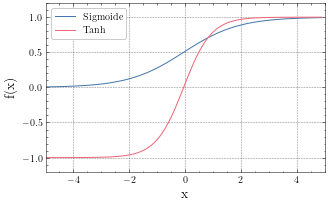

In [4]:
with plt.style.context(['science', 'grid', 'bright']):
    fig, ax = plt.subplots(figsize=(5, 3.1))
    plt.plot(x.detach().numpy(), sigmoid, label="Sigmoide")
    plt.plot(x.detach().numpy(), tanh, label="Tanh")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("f(x)", fontsize=14)
    plt.xlim(-5, 5)
    plt.ylim(-1.2, 1.2)
    legend = ax.legend(loc='upper left')
    savefig("sigmoide_tanh", "pdf")
    plt.show()

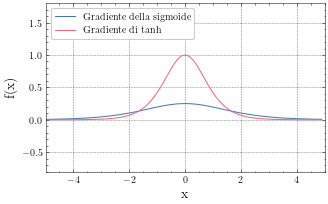

In [8]:
with plt.style.context(['science', 'grid', 'bright']):
    fig, ax = plt.subplots(figsize=(5, 3.1))
    plt.plot(x.detach().numpy(), dsigmoid, label="Gradiente della sigmoide")
    plt.plot(x.detach().numpy(), dtanh, label="Gradiente di tanh")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("f(x)", fontsize=14)
    plt.xlim(-5, 5)
    plt.ylim(-0.8, 1.8)
    legend = ax.legend(loc='upper left')
    savefig("sigmoide_tanh_der", "pdf")
    plt.show()

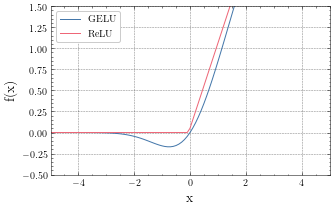

In [6]:
with plt.style.context(['science', 'grid', 'bright']):
    fig, ax = plt.subplots(figsize=(5, 3.1))
    plt.plot(x.detach().numpy(), gelu.detach().numpy(), label="GELU")
    plt.plot(x.detach().numpy(), relu, label="ReLU")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("f(x)", fontsize=14)
    plt.xlim(-5, 5)
    plt.ylim(-0.5, 1.5)
    legend = ax.legend(loc='upper left')
    savefig("relu_gelu", "pdf")
    plt.show()

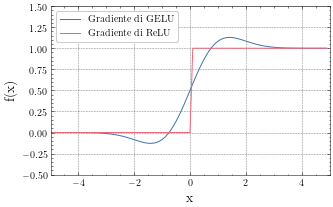

In [9]:
with plt.style.context(['science', 'grid', 'bright']):
    fig, ax = plt.subplots(figsize=(5, 3.1))
    plt.plot(x.detach().numpy(), dgelu, label="Gradiente di GELU")
    plt.plot(x.detach().numpy(), drelu, label="Gradiente di ReLU")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("f(x)", fontsize=14)
    plt.xlim(-5, 5)
    plt.ylim(-0.5, 1.5)
    legend = ax.legend(loc='upper left')
    savefig("relu_gelu_der", "pdf")
    plt.show()